Amjad Alawami, Neha Das, Chiara Perez, Stina Tam

**Measure Marketing Effect using Linear Regression**

In [ ]:
import pandas as pd
import sklearn
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
myfile = files.upload()


Saving WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv to WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv


In [ ]:
df = pd.read_csv("WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv", index_col= 0)
df.head()

,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
MarketID,,,,,,
1,Medium,1,4,3,1,33.73
1,Medium,1,4,3,2,35.67
1,Medium,1,4,3,3,29.03
1,Medium,1,4,3,4,39.25
1,Medium,2,5,2,1,27.81


In [ ]:
df['SalesInThousands'].describe()

count    548.000000
mean      53.466204
std       16.755216
min       17.340000
25%       42.545000
50%       50.200000
75%       60.477500
max       99.650000
Name: SalesInThousands, dtype: float64

Text(0.5, 1.0, 'Sales by Promotion Type')

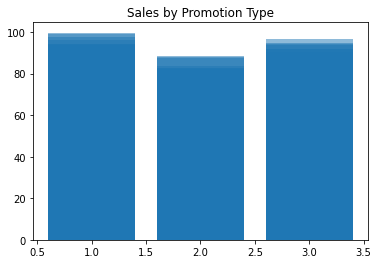

In [ ]:
plt.bar(df['Promotion'], df['SalesInThousands'], alpha=0.5)
plt.title("Sales by Promotion Type")

Text(0.5, 1.0, 'Sales by Market Size')

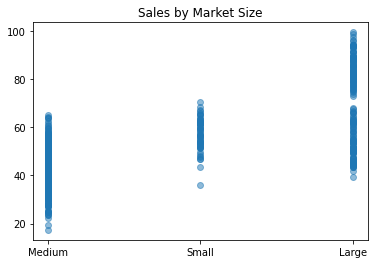

In [ ]:
plt.scatter(df['MarketSize'], df['SalesInThousands'], alpha=0.5)
plt.title("Sales by Market Size")

Text(0.5, 1.0, 'Sales by Age of Store')

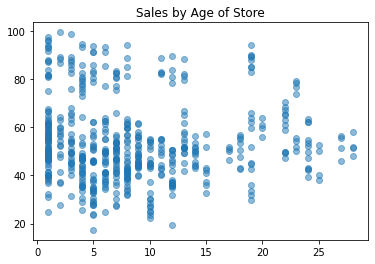

In [ ]:
plt.scatter(df['AgeOfStore'], df['SalesInThousands'], alpha=0.5)
plt.title("Sales by Age of Store")

Text(0.5, 1.0, 'Sales by Week')

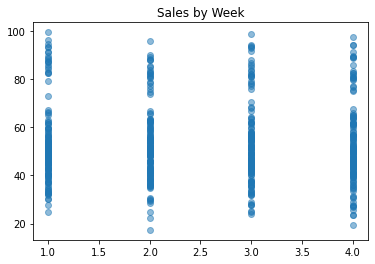

In [ ]:
plt.scatter(df['week'], df['SalesInThousands'], alpha=0.5)
plt.title("Sales by Week")

In [ ]:
Iplt.bar(df['LocationID'], df['SalesInThousands'], alpha=0.5)
plt.title("Sales by Week")

NameError: ignored

**Create Data for Model**


In [ ]:
df.loc[df['MarketSize'] == 'Small', 'Mkt_Small'] =1
df.loc[df['MarketSize'] == 'Medium', 'Mkt_Medium'] =1
df.loc[df['MarketSize'] == 'Large', 'Mkt_Large'] =1
df.loc[df['Promotion'] == 1, 'Promotion_1'] = 1
df.loc[df['Promotion'] == 2, 'Promotion_2'] = 1
df.loc[df['Promotion'] == 3, 'Promotion_3'] = 1


In [ ]:
from numpy import nan
df.dropna
df = df.replace(nan, 0)
df

,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands,Mkt_Small,Mkt_Medium,Mkt_Large,Promotion_1,Promotion_2,Promotion_3
MarketID,,,,,,,,,,,,
1,Medium,1,4,3,1,33.73,0.0,1.0,0.0,0.0,0.0,1.0
1,Medium,1,4,3,2,35.67,0.0,1.0,0.0,0.0,0.0,1.0
1,Medium,1,4,3,3,29.03,0.0,1.0,0.0,0.0,0.0,1.0
1,Medium,1,4,3,4,39.25,0.0,1.0,0.0,0.0,0.0,1.0
1,Medium,2,5,2,1,27.81,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10,Large,919,2,1,4,64.34,0.0,0.0,1.0,1.0,0.0,0.0
10,Large,920,14,2,1,50.20,0.0,0.0,1.0,0.0,1.0,0.0
10,Large,920,14,2,2,45.75,0.0,0.0,1.0,0.0,1.0,0.0


**Create Model**

In [ ]:
#What is the effect of each promotion?
result = smf.ols("SalesInThousands ~ Promotion_1 + Promotion_2 + Promotion_3", df).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:       SalesInThousands   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     21.95
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           6.77e-10
Time:                        13:16:46   Log-Likelihood:                -2300.5
No. Observations:                 548   AIC:                             4607.
Df Residuals:                     545   BIC:                             4620.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      40.1982      0.518     77.631      

In [ ]:
#Does market size change sales?
result = smf.ols("SalesInThousands ~ Mkt_Small + Mkt_Medium", df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       SalesInThousands   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     268.9
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           5.63e-82
Time:                        12:09:20   Log-Likelihood:                -2133.6
No. Observations:                 548   AIC:                             4273.
Df Residuals:                     545   BIC:                             4286.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.1167      0.919     76.315      0.0

**What is the best promotion for each Market Size??**

In [ ]:
#Create new dataframe for each market
df_small = df.loc[df['MarketSize'] == 'Small']
df_medium = df.loc[df['MarketSize'] == 'Medium']
df_large = df.loc[df['MarketSize'] == 'Large']

In [ ]:
#Small Market
result = smf.ols("SalesInThousands ~ Promotion_1 + Promotion_2 + Promotion_3", df_small).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       SalesInThousands   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     16.58
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           2.12e-06
Time:                        13:16:52   Log-Likelihood:                -184.40
No. Observations:                  60   AIC:                             374.8
Df Residuals:                      57   BIC:                             381.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      42.6218      0.527     80.918      

For Small Size, Promo1 is best!

In [ ]:
#Medium Market
result = smf.ols("SalesInThousands ~ Promotion_1 + Promotion_2 + Promotion_3", df_medium).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       SalesInThousands   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     29.69
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           1.52e-12
Time:                        09:06:10   Log-Likelihood:                -1131.0
No. Observations:                 320   AIC:                             2268.
Df Residuals:                     317   BIC:                             2279.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      33.0640      0.350     94.351      

For medium, Promo 1 is best

In [ ]:
#Large Market
result = smf.ols("SalesInThousands ~ Promotion_1 + Promotion_2 + Promotion_3", df_large).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       SalesInThousands   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     21.45
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           5.26e-09
Time:                        09:06:19   Log-Likelihood:                -694.97
No. Observations:                 168   AIC:                             1396.
Df Residuals:                     165   BIC:                             1405.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      53.1905      0.890     59.733      

For large, Promo 3 is best

**What is the effect of age? Controlling for age, which promotion works best for each market?**


In [ ]:
#Small
result = smf.ols("SalesInThousands~Promotion_1+Promotion_2+Promotion_3+AgeOfStore",data=df_small).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       SalesInThousands   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     15.29
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           2.19e-07
Time:                        13:23:57   Log-Likelihood:                -180.20
No. Observations:                  60   AIC:                             368.4
Df Residuals:                      56   BIC:                             376.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      40.7039      0.826     49.263      

In [ ]:
#Medium
result = smf.ols("SalesInThousands~Promotion_1+ Promotion_2+ Promotion_3+ AgeOfStore",data=df_medium).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       SalesInThousands   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     20.85
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           2.36e-12
Time:                        13:39:03   Log-Likelihood:                -1129.6
No. Observations:                 320   AIC:                             2267.
Df Residuals:                     316   BIC:                             2282.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      32.2631      0.590     54.716      

In [ ]:
#Large
result = smf.ols("SalesInThousands~Promotion_1+Promotion_2+Promotion_3+AgeOfStore",data=df_large).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       SalesInThousands   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     14.21
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           2.82e-08
Time:                        13:43:49   Log-Likelihood:                -694.97
No. Observations:                 168   AIC:                             1398.
Df Residuals:                     164   BIC:                             1410.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      53.2024      1.383     38.459      